#**EXPLORATORY DATA ANALYSIS #0001: FOREST FIRES IN PORTUGAL**

This Colab notebook explores environmental and human factors influencing forest fire severity and frequency using the UCI Forest Fires dataset.

**Author :** Divyabhanu Rana

**Date :** 20 April 2025 - 15 May 2025

**LinkedIn :** https://www.linkedin.com/in/divyabhanu-rana/

**GitHub :** https://github.com/divyabhanu-rana

# *LOADING LIBRARIES AND THE UCI DATASET*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px


df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv")

In [2]:
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


# *DATA CLEANING AND PRE-PROCESSING STEPS*

In [4]:
## CONVERTING 'month' AND 'day' TO ORDERED CATEGORIES
month_order = ['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']
day_order = ['mon','tue','wed','thu','fri','sat','sun']

df['month'] = pd.Categorical(df['month'], categories = month_order, ordered = True)
df['day'] = pd.Categorical(df['month'], categories = day_order, ordered = True)

## USING log-transform 'area' to reduce skewness in dataset
df['log_area'] = df['area'].apply(lambda x: np.log1p(x))

# *UNIVARIATE ANALYSIS (FOCUSING ON DESCRIBING AND SUMMARIZING THE DATA)*

Text(0.5, 1.0, 'Distribution of Burned area (skewed)')

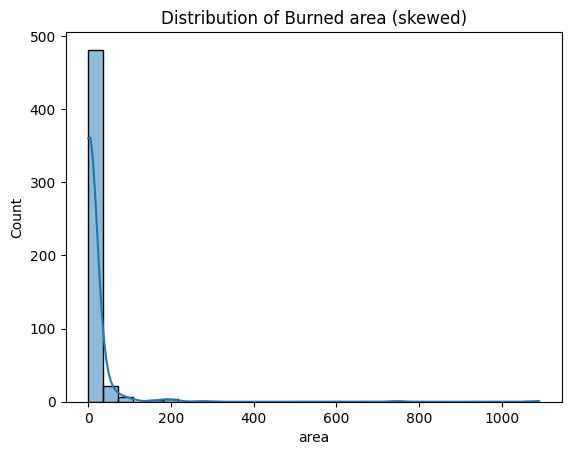

In [5]:
sns.histplot(df['area'].dropna(), bins = 30, kde = True)
plt.title('Distribution of Burned area (skewed)')

The above graph highlights that majority of the fire incidents burned very small areas (close to 0 hectares), with a few extreme outliers reached over 1000 ha, causing the long tail towards the right.
- A heavily right-skewed distribution is common in environmental damage datasets (eg. fires, floods, etc.)

Text(0.5, 0, 'log(1 + area)')

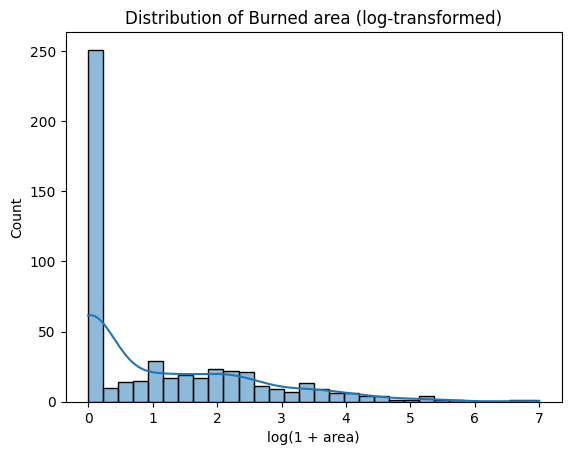

In [7]:
sns.histplot(df['log_area'].dropna(), bins = 30, kde = True)
plt.title('Distribution of Burned area (log-transformed)')
plt.xlabel('log(1 + area)')

Since the original area variable was heavily right-skewed due to many small fire incidents and a few extreme ones, I applied a log(1 + area) transformation in an effort to normalize the distribution for a better visualisation.

Text(0.5, 0.98, 'Boxplots of Environmental Variables')

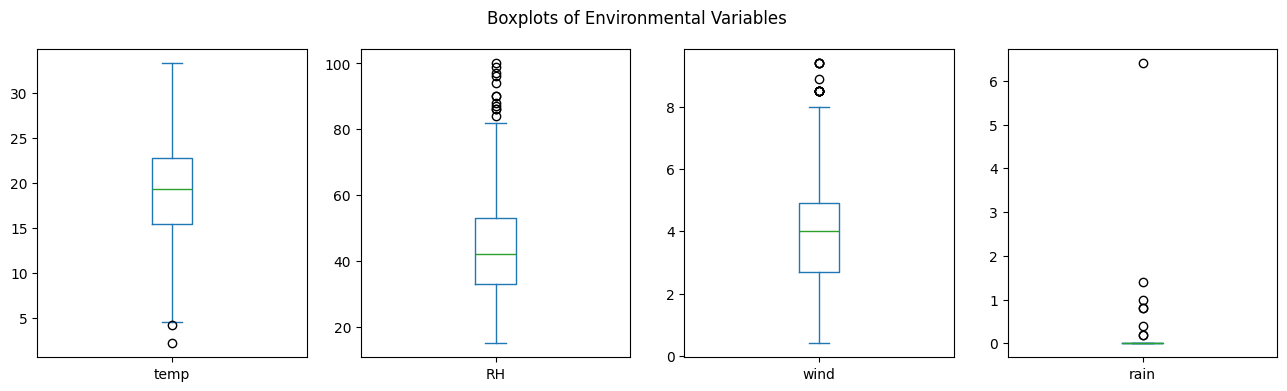

In [8]:
## BOX PLOTS FOR ENVIRONMENTAL FEATURES
features = ['temp','RH','wind','rain']
df[features].plot(kind = 'box', subplots = True, layout = (1,4), figsize = (16,4), sharey=False)
plt.suptitle('Boxplots of Environmental Variables')

# *BIVARIATE AND MULTIVARIATE ANALYSIS*

Text(0.5, 1.0, 'The Correlation Matrix')

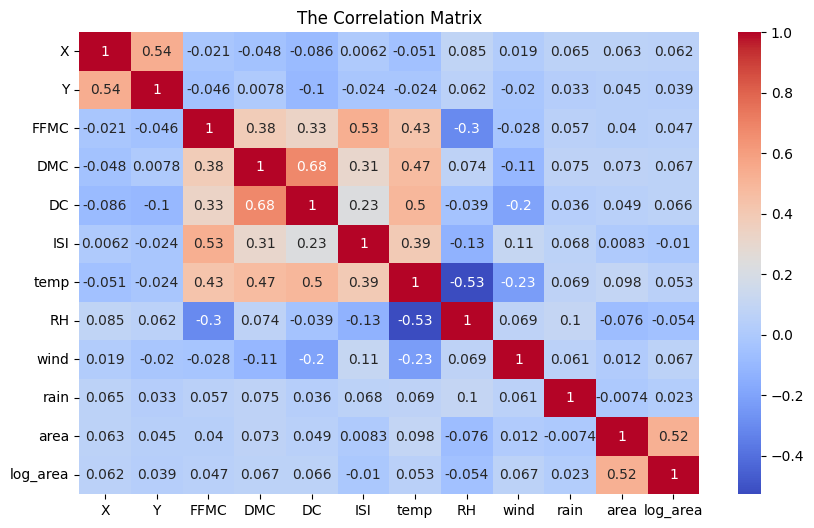

In [10]:
## CORRELATION MATRIX
numeric_df = df.select_dtypes(include = ['number'])

corr = numeric_df.corr()
plt.figure(figsize = (10,6))
sns.heatmap(corr, annot = True, cmap = 'coolwarm')
plt.title('The Correlation Matrix')

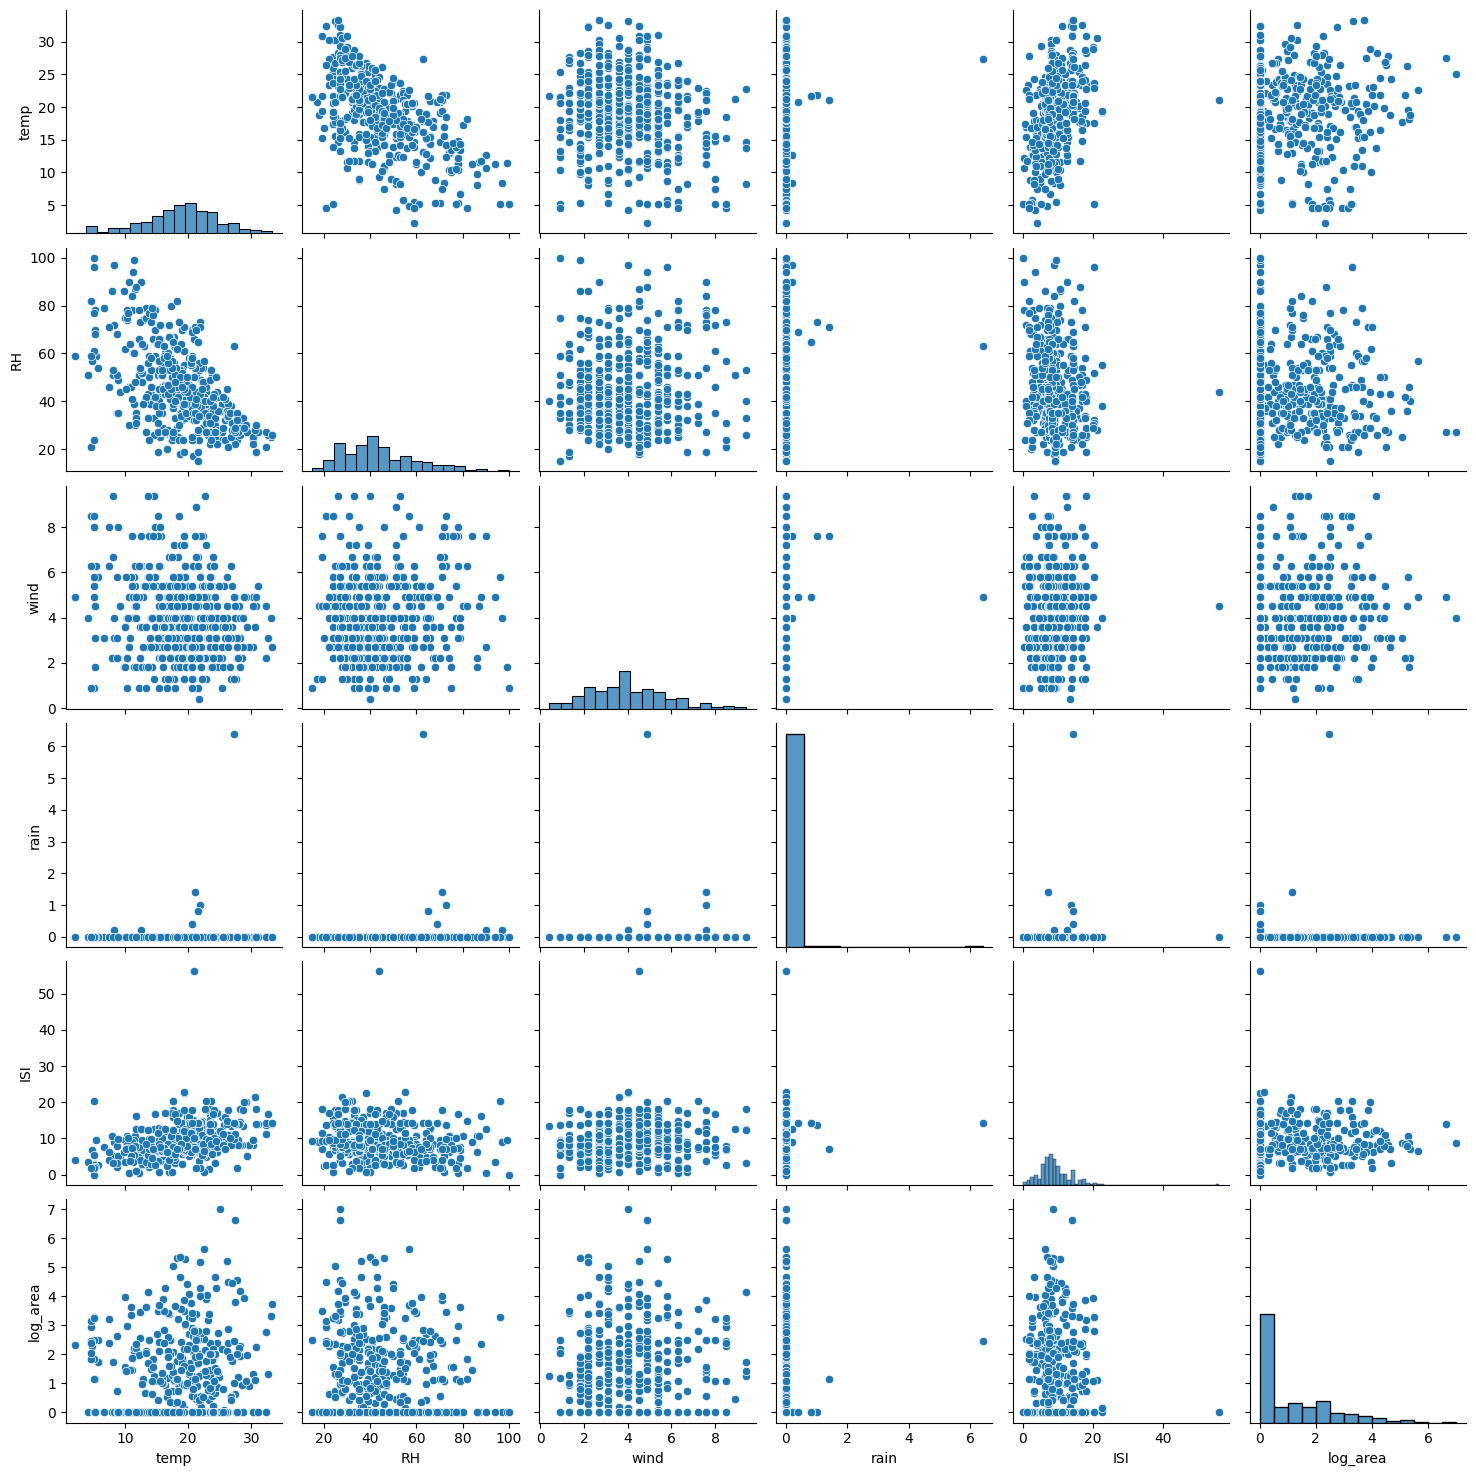

In [11]:
## PAIR PLOT
sns.pairplot(numeric_df[['temp','RH','wind','rain','ISI','log_area']])

The pairplot confirms that no single variable strongly predicts fire severity (log_area) on its own. However, weak patterns exist (e.g., high temp + low RH = higher log_area), which supports building multivariate models and considering non-linear relationships. Rain is largely uninformative due to sparsity, while ISI and temperature show slight positive associations with fire impact.

# *TEMPORAL TRENDS*

Text(0, 0.5, 'Count')

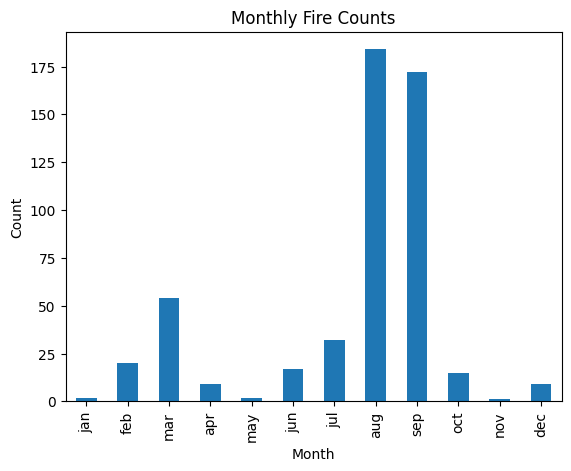

In [12]:
## FIRE COUNTS PER MONTH
monthly_counts = df['month'].value_counts().sort_index()
monthly_counts.plot(kind = 'bar')
plt.title('Monthly Fire Counts')
plt.xlabel('Month')
plt.ylabel('Count')

<ipython-input-13-ee18c9abeffd>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('month')['area'].mean().plot(kind='bar', color='darkorange')


Text(0.5, 1.0, 'Average Burned Area per Month')

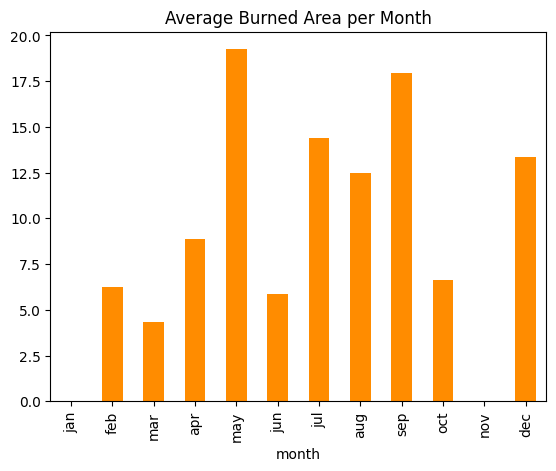

In [13]:
## MONTHLY MEAN AREA BURNED
df.groupby('month')['area'].mean().plot(kind='bar', color='darkorange')
plt.title('Average Burned Area per Month')

The bars in the above graph shows the mean severity of fires per month -- not frequency.
- Here, May and September have highest avg burned area, despite might not having highest frequency of incidents. This suggests severe, although fewer, fires in those months.
- Value of December might be due to an outlier (one large fire skewing the mean), especially since few fires occur in winter season.

# *SPATIAL DISTRIBUTION*

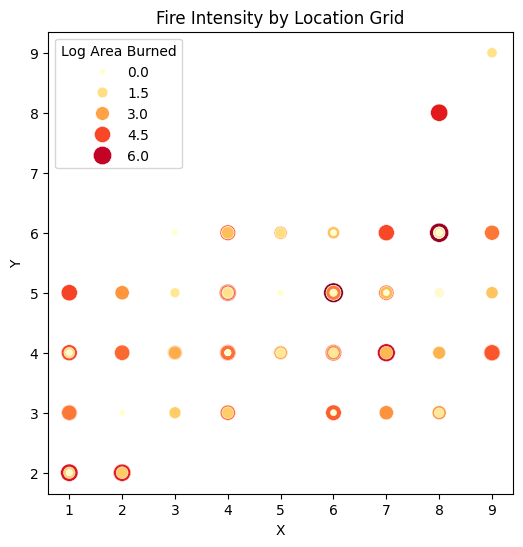

In [14]:
## SIMPLE GRID PLOT OF THE LOCATIONS
plt.figure(figsize = (6,6))
sns.scatterplot(x = 'X', y = 'Y', hue = 'log_area', data = df, palette = 'YlOrRd', size = 'log_area', sizes = (20,200))
plt.title('Fire Intensity by Location Grid')
plt.legend(title='Log Area Burned')

The above grid plot highlights where the most intense forest fires occur across the grid. It enables decision-makers to pinpoint high-risk zones, helping prioritize localized prevention, resource placement, and early warning systems. The use of both color and size to encode log(area) ensures that severe fires stand out clearly without being skewed by extreme values.

# *TAKEAWAYS FROM THIS EDA*

- Most of the forest fire incidents occur during the months of **August and September**, however, months of **July and May** see larger areas burned as compared to Aug and Sep respectively.
- Fires are spatially concentrated in specific grid zones, indicating potential geographical vulnerability or land-use patterns influencing fire behavior.
- Temperature and wind speed have a slight positive correlation with fire size (log_area).
- Relative humidity (RH) shows a moderate negative correlation with fire size — drier air tends to exacerbate fires.
- Visual pairwise relationships between key variables (temp, RH, wind, rain, ISI, log_area) reveal:
  1. An inverse relationship between RH and fire size;
  2. No strong linear patterns, reinforcing the need for non-linear models or feature engineering in predictive tasks.